# 1D Linear Convection

Solves by FDM (forward in time, backward in space):

$$ \frac{ \partial u}{\partial t} + c \frac{\partial u}{\partial x} = 0 $$

wave speed $c = 1$

Initial Condition
$$ u_0(x)=   \left\{
\begin{array}{ll}
      1 & 0 \leq x<0.5 \\
      2 & 0.5 \leq x \leq 1 \\
      1 & 1 < x \leq 2
\end{array} 
\right.  $$

Boundary Condition: $u(0,t) = 1$


In [58]:
import numpy as np
from matplotlib import pyplot as plt
import time, sys
%matplotlib inline

def linconv(nodes_x, dt):
    """
    Solves and plots the 1D linear convection equation
    
    Parameters
    ----------
    nodes_x: Integer 
        number of spatial nodes
        
    dt: Float
        time step size
    """
    
    x_start, x_end = 0, 2 # domain limits
    steps_t = 20    # number of time steps
    dx = (x_end - x_start)/(nodes_x-1)  # distance between spatial nodes
    c  = 1           # wave speed
    CFL = c*dt/dx

    x  = np.linspace(x_start, x_end, nodes_x)
    u1 = np.ones(nodes_x) # solution at nth time step
    u2 = np.ones(nodes_x) # solution at (n+1)th time step

    u1[int(0.5/dx):int(1/dx)] = 2 # set initial conditions

    # plot initial conditions
    fig, ax = plt.subplots(1, 2, figsize=[16,6])
    fig.subplots_adjust(wspace=0.3)
    ax[0].set_title("$u_0(x,0)$", fontsize=20)
    ax[0].plot(x, u1, marker="o")
    ax[0].set_xlabel("x", fontsize=18)
    ax[0].set_ylabel("u", fontsize=18)

    # solve the finite difference equation
    for n in range(steps_t):
        u2[1:] = u1[1:] - (c*dt/dx) * (u1[1:] - u1[0:-1])
        u1 = u2

    # plot results  
    ax[1].set_title("u(x, {}) \n CFL = {} ".format(steps_t*dt, CFL), fontsize=18)
    ax[1].plot(x, u2, marker="o")
    ax[1].set_xlabel("x", fontsize=18)
    ax[1].set_ylabel("u", fontsize=18)

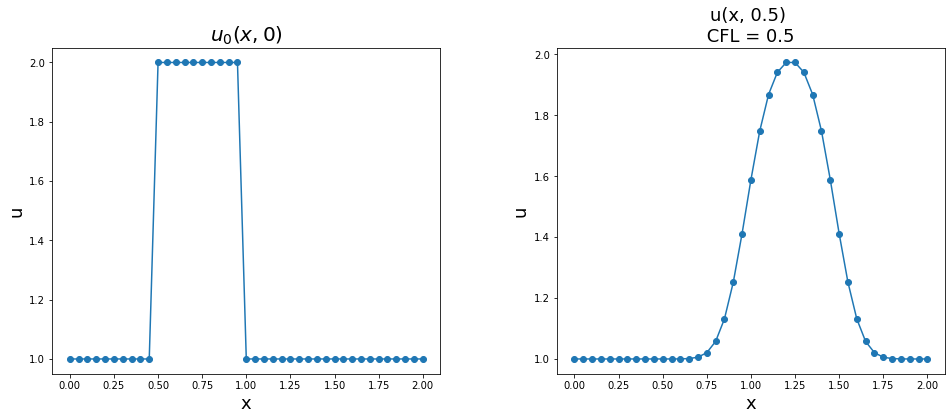

In [59]:
linconv(41,0.025)

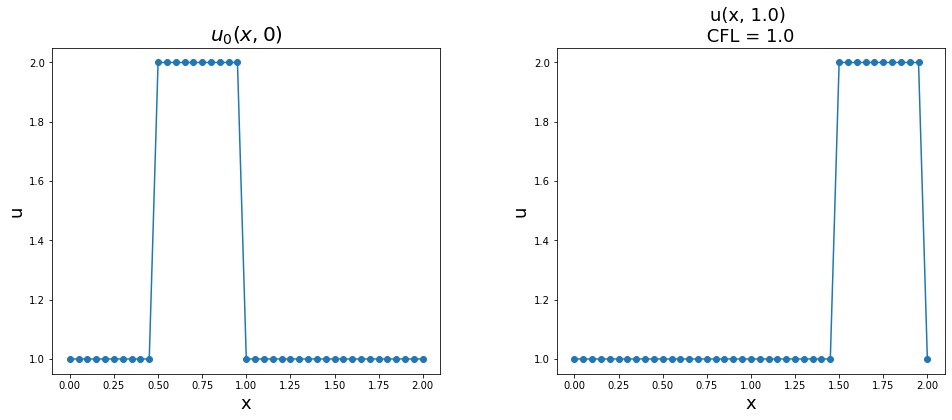

In [60]:
linconv(41,0.05)

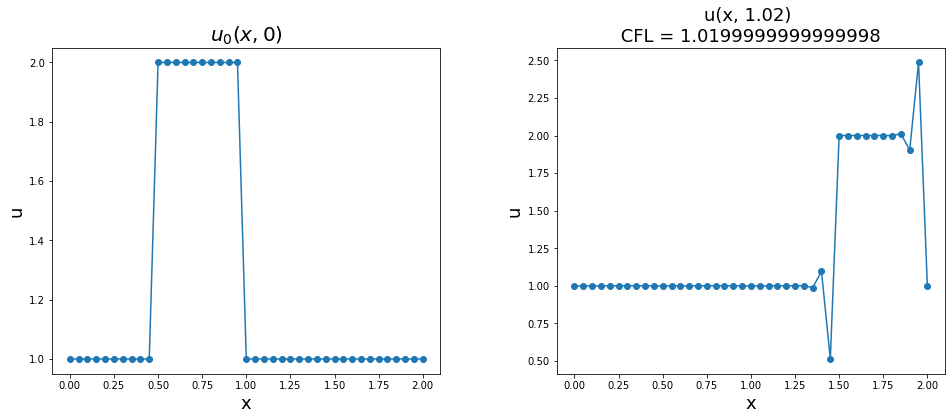

In [61]:
linconv(41,0.051)